# Bike Sharing Assignment

## Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands










## Importing Libraries

In [1]:
# importing all the required libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression



In [2]:
# importing warnings

import warnings
warnings.filterwarnings('ignore')


### Step 1: Reading Dataset and Understanding Data


In [3]:
bike_sharing_df = pd.read_csv('day.csv')
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the shape of the dataframe

bike_sharing_df.shape

(730, 16)

In [5]:
#checking for null values

bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There is no null values in the bike sharing dataset

### Step 2: Data Cleaning and Preparation

### 2.1 Data Cleaning

In [6]:
# Dropping off some variable which are not relavant to the analysis

bike_sharing_df1 = bike_sharing_df.drop(["casual","registered","dteday", "instant"], axis=1)


Dropping off unwanted columns:

1. The columns casual and registered can be removed as the cnt target variable is the sum of casual and registered columns and can be utilized instead.
2. dteday can be removed since yr, month and day wise columns are already present
3. instant column does not have relavance in our data analysis hence it can be removed       
        
        

In [7]:
bike_sharing_df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
# Checking the shape of the new df

bike_sharing_df1.shape

(730, 12)

### 2.2 Data Preparation

Converting Categorical data fro numeric to descriptive type




In [9]:
#Conveting weathersit variable

bike_sharing_df1.weathersit.replace({1 : 'Clear', 2 : 'Mist + Cloudy', 3 : 'Light Snow + Rain', 4 : 'Heavy Rain + Ice Pallets'}, inplace=True)



In [10]:
# Checking weathersit variable

bike_sharing_df1.weathersit.head()



0    Mist + Cloudy
1    Mist + Cloudy
2            Clear
3            Clear
4            Clear
Name: weathersit, dtype: object

In [11]:
#Conveting Season variable

bike_sharing_df1.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)





In [12]:
# Checking Season variable

bike_sharing_df1.season.head()



0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

Season and weathersit columns are converted from scale 1 to 4 to descriptive type to understand easily

### Step 3: Visualising the Data

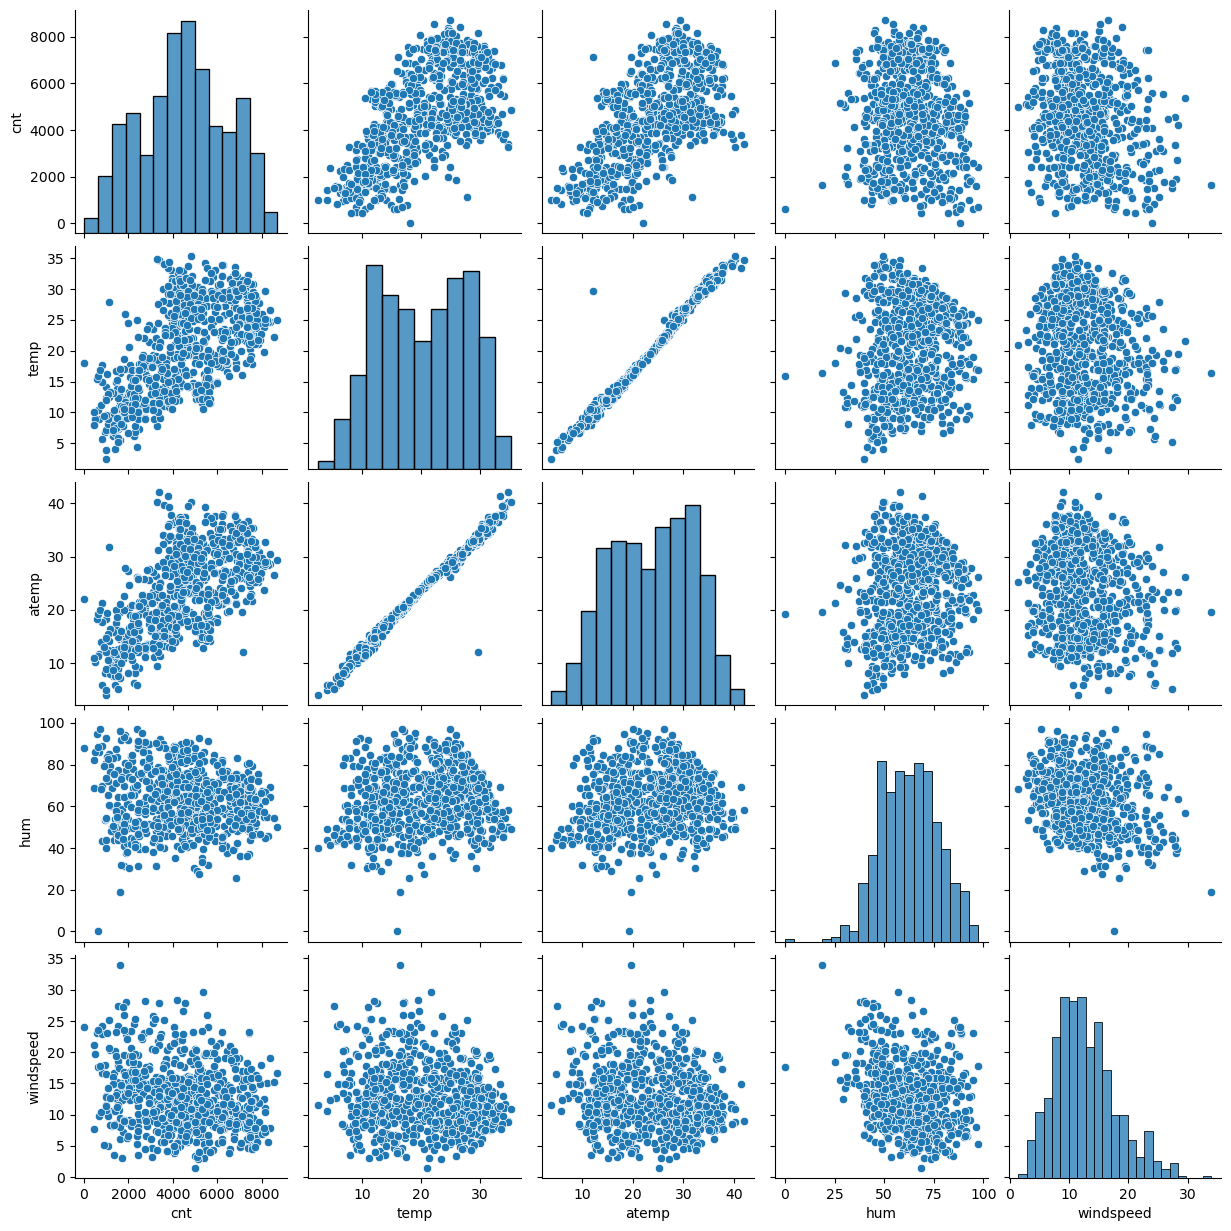

In [13]:
# Visualizing the numerical variables using pairplot

num_cols = ["cnt","temp","atemp","hum","windspeed"]

sns.pairplot(bike_sharing_df1[num_cols])
plt.show()




1. temp and atemp are strongly correlated with cnt as compared to others
2. Also, temp and atemp are correlated with eachother almost forming a straight line hence it will lead to multocolinearity. As a result of this, one of these two fileds need to be removed



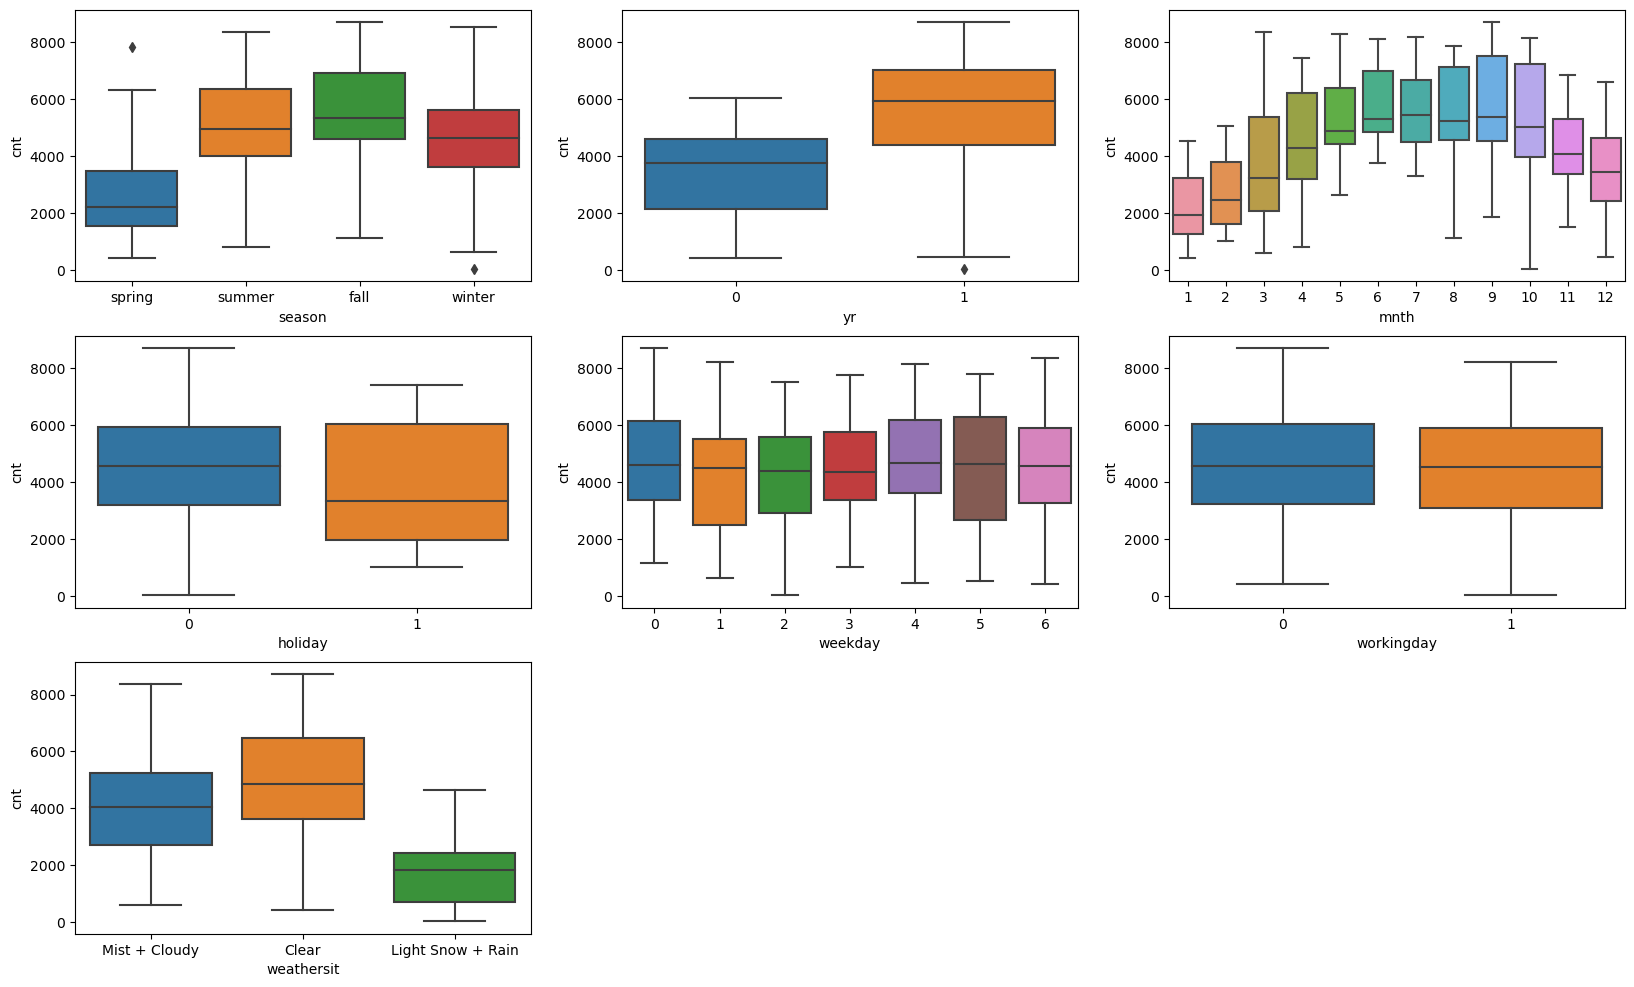

In [14]:
# Visualizing the Categorical variables using boxplot

cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_df1)

plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_df1)

plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_df1)

plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_df1)

plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_df1)

plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_df1)

plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_df1)

plt.show()
    




1. There is a rise of rental bike during fall while lowest during spring
2. Also, count of rental bikes is increased during 2019 (depicted as 1) as compared to 2018
3. There is no significance difference between weekdays
4. Count of rental bikes is higher during clear weather and lowest when there is a light snow and Rain


### Step 4: Data prepation for modelling

In [15]:
# Convering the required variable to dummy variable

dummy_var_weather = pd.get_dummies(bike_sharing_df1.weathersit, drop_first=True)
dummy_var_weather.head()



,Light Snow + Rain,Mist + Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [16]:
# Merging the dummy columns to the main df

bike_sharing_df1 = pd.concat([bike_sharing_df1, dummy_var_weather], axis=1)
bike_sharing_df1.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Light Snow + Rain,Mist + Cloudy
0,spring,0,1,0,1,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,0,1
1,spring,0,1,0,2,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,0,1
2,spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0
3,spring,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0
4,spring,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0


In [17]:
# Dropping off the weathersit col as it is no longer required 

bike_sharing_df1.drop(['weathersit'], axis=1, inplace=True)



In [18]:
# checking the df

bike_sharing_df1.head()


,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow + Rain,Mist + Cloudy
0,spring,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,0,1
1,spring,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,0,1
2,spring,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,0,0
3,spring,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,0,0
4,spring,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,0,0


In [19]:
# Now again performing the same using season data

dummy_var_season = pd.get_dummies(bike_sharing_df1.season, drop_first=True)
dummy_var_season.head()



,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
# Merging the dummy columns to the main df

bike_sharing_df1 = pd.concat([bike_sharing_df1, dummy_var_season], axis=1)
bike_sharing_df1.head()



,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow + Rain,Mist + Cloudy,spring,summer,winter
0,spring,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0
1,spring,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0
2,spring,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,spring,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,spring,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0


In [21]:
# Dropping off the season col as it is no longer required 

bike_sharing_df1.drop(['season'], axis=1, inplace=True)



In [22]:
# checking the df

bike_sharing_df1.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow + Rain,Mist + Cloudy,spring,summer,winter
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0


### Step 5: Splitting the Data into Training and Testing Sets

In [23]:
# Splitting the df between train and test data

df_train, df_test = train_test_split(bike_sharing_df1,train_size= 0.7, test_size= 0.3, random_state= 100 )



In [24]:
# Checking the shape of both train and test data

print(df_train.shape)
print(df_test.shape)



(510, 15)
(219, 15)


###  5.1 Rescaling the Features

In [25]:
scaler = MinMaxScaler()

In [26]:
# Scaling the numerical variable

num_cols = ['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'weekday', 'mnth']
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])


In [27]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow + Rain,Mist + Cloudy,spring,summer,winter
653,1,0.818182,0,0.500000,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,1
576,1,0.545455,0,0.500000,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,0.181818,0,0.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,1,0,0
728,1,1.000000,0,0.166667,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,1,0,0
482,1,0.272727,0,0.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0


In [28]:
# Checking the values of num_cols

df_train.describe()


,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow + Rain,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.504456,0.025490,0.491830,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.315338,0.157763,0.329528,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Values for num_cols are coming between 0 and 1

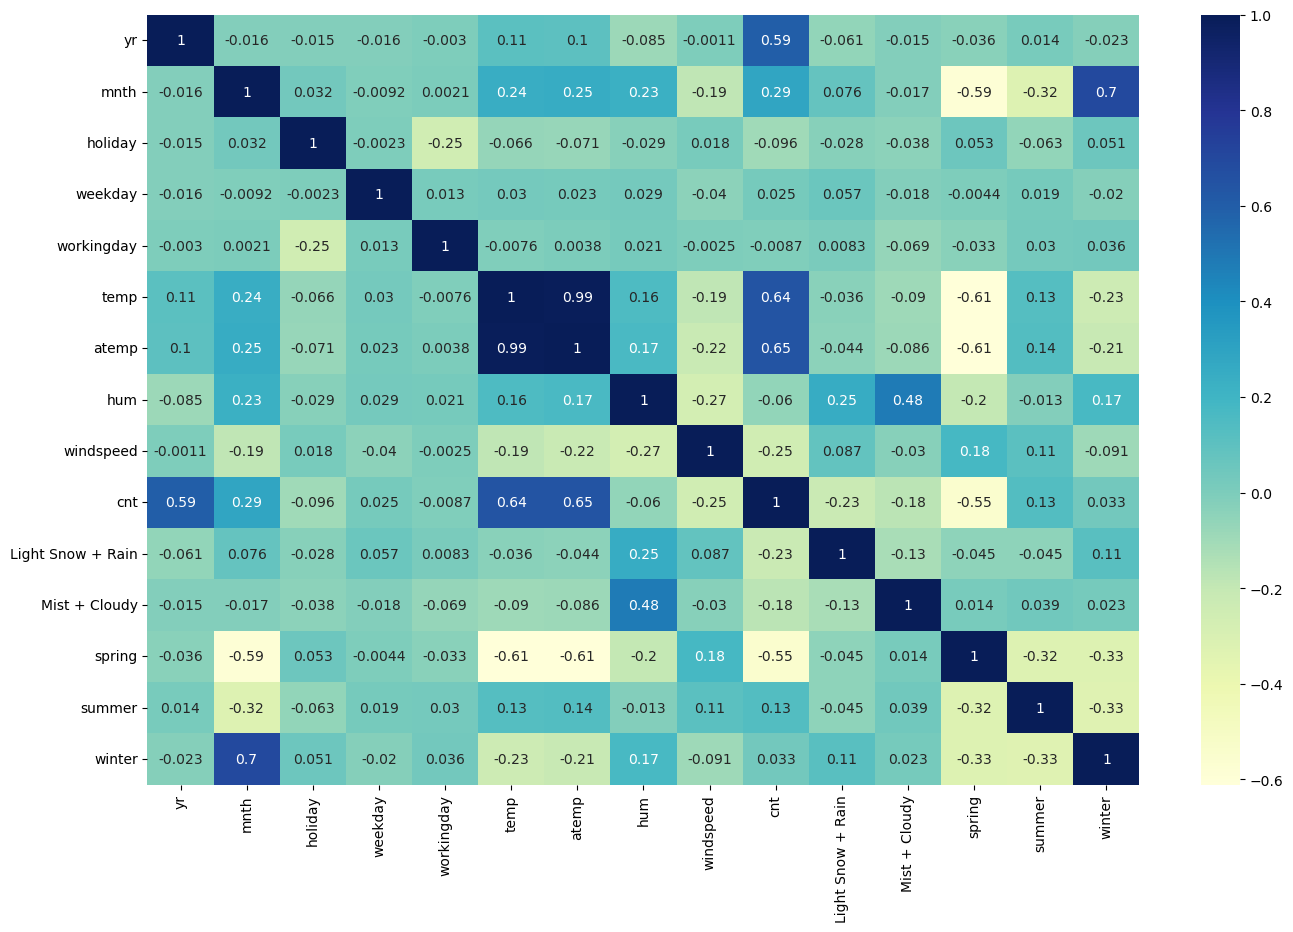

In [29]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

1. cnt has strong correlation with temp, atemp and yr variable
2. cnt has the negative correlation with spring



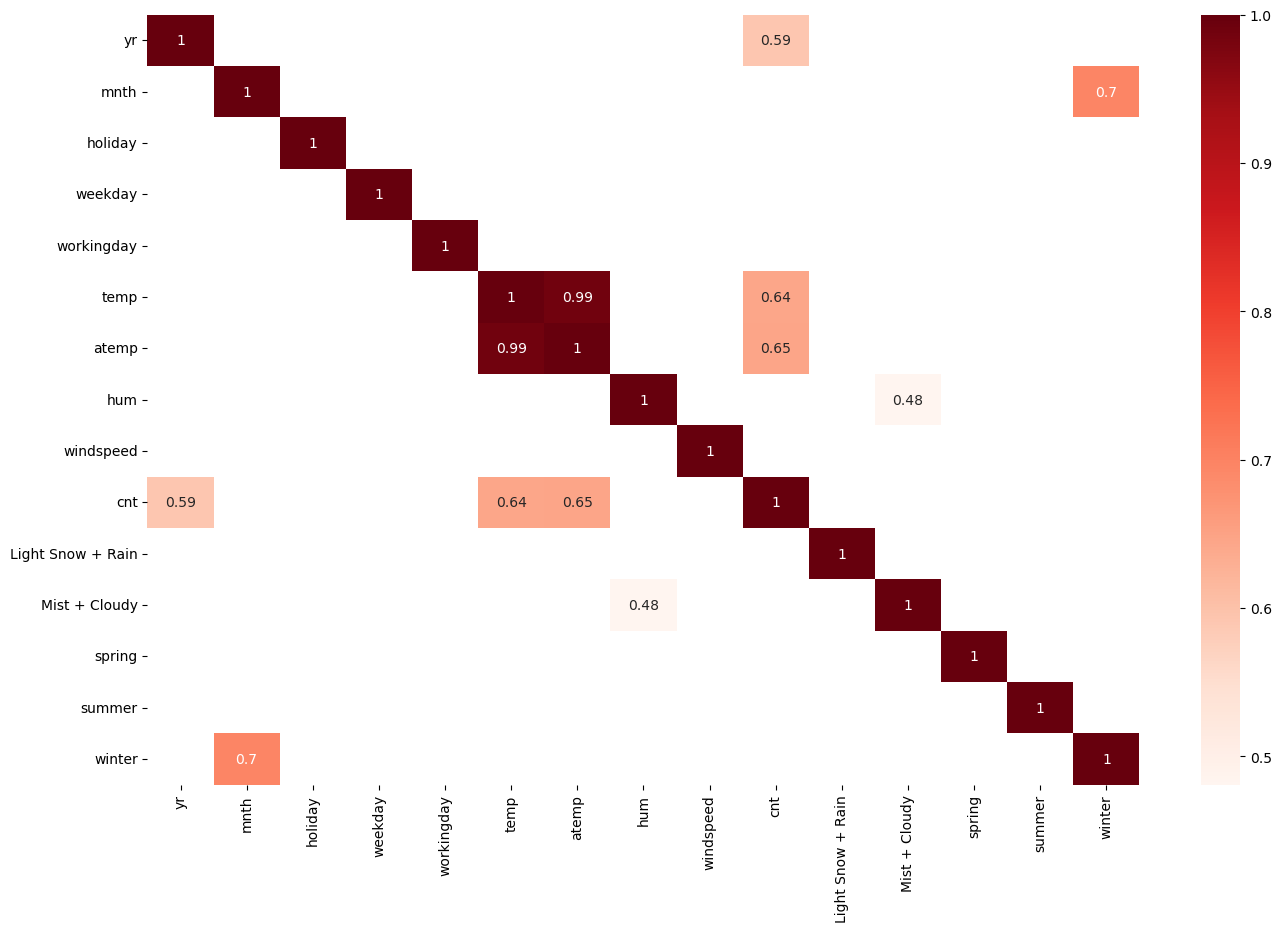

In [30]:
dfCorr = df_train.corr()
filter_Df = dfCorr[(dfCorr >= 0.4)]
plt.figure(figsize=(16,10))
sns.heatmap(filter_Df, annot=True, cmap="Reds")
plt.show()


The variables such as mnth-winter, Mist+cloudy-hum, atemp-temp shows strong correlation which means there is multicolinearity exists between all of these variables 



###  5.2 Dividing into X and Y sets for the model building

In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

### Step 6: Building a linear model

Here, we are using top to bottom approach by adding all the variables and then removing one by one

In [32]:
# build a model using all variables
X_train_sm = sm.add_constant(X_train)

# create a model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params


const                0.290024
yr                   0.231208
mnth                 0.015161
holiday             -0.101820
weekday              0.017666
workingday          -0.020104
temp                 0.434234
atemp                0.060266
hum                 -0.136164
windspeed           -0.178128
Light Snow + Rain   -0.243936
Mist + Cloudy       -0.055714
spring              -0.070824
summer               0.045129
winter               0.083039
dtype: float64

In [33]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     172.0
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          8.32e-180
Time:                        17:22:33   Log-Likelihood:                 489.58
No. Observations:                 510   AIC:                            -949.2
Df Residuals:                     495   BIC:                            -885.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2900      0.039      7.512      0.000       0.214       0.366
yr                    0.2312      0.008     27.285      0.000       0.215       0.248
mnth                  0.0152      0.026      0.581      0.561      -0.036       0.066
holiday              -0.1018      0.028     -3.695      0.000      -0.156      -0.048
weekday               0.0177      0.013      1.388      0.166      -0.007       0.043
workingday           -0.0201      0.010     -2.091      0.037      -0.039      -0.001
temp                  0.4342      0.141      3.081      0.002       0.157       0.711
atemp                 0.0603      0.144      0.419      0.676      -0.223       0.343
hum                  -0.1362      0.039     -3.457      0.001      -0.214      -0.059
windspeed            -0.1781      0.027     -6.503      0.000      -0.232      -0.124
Light Snow + Rain    -0.2439      0.028     -8.830      0.000      -0.298      -0.190
Mist + Cloudy        -0.0557      0.011     -5.043      0.000      -0.077      -0.034
spring               -0.0708      0.023     -3.031      0.003      -0.117      -0.025
summer                0.0451      0.016      2.844      0.005       0.014       0.076
winter                0.0830      0.019      4.404      0.000       0.046       0.120
==============================================================================
Omnibus:                       67.270   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.427
Skew:                          -0.686   Prob(JB):                     3.25e-36
Kurtosis:                       5.410   Cond. No.                         92.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. The R squared of the model is ~83% which suggest that the model is able to explain the ~83% of the variance which is good
2. Some of the variables aren't really significant such as atemp, month, etc. (in presence of other variable). It would be better to supplement this with the VIF information
3. Overall the Prob (F-statistic) is less than 0 which means the model fit is overall significant




### Checking VIF

In [34]:
# Creating a df that contains the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
5,temp,379.46
6,atemp,368.00
7,hum,31.14
1,mnth,12.34
8,windspeed,5.04
13,winter,4.68
11,spring,4.39
4,workingday,3.69
3,weekday,3.21
12,summer,2.71


Keeping in mind the 4 types of scenarios: High P-value and VIF, Low P-value and VIF, High P-value and Low VIF, and Low P-value and High VIF, first we will remove the variable which has High P-value and VIF i.e atemp

In [35]:
# We will first remove the atemp variable and re-run the model

X = X_train.drop('atemp', axis=1)
X.head()


,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,Light Snow + Rain,Mist + Cloudy,spring,summer,winter
653,1,0.818182,0,0.500000,1,0.509887,0.575354,0.300794,0,0,0,0,1
576,1,0.545455,0,0.500000,1,0.815169,0.725633,0.264686,0,0,0,0,0
426,1,0.181818,0,0.000000,0,0.442393,0.640189,0.255342,0,1,1,0,0
728,1,1.000000,0,0.166667,1,0.245101,0.498067,0.663106,0,0,1,0,0
482,1,0.272727,0,0.000000,0,0.395666,0.504508,0.188475,0,1,0,1,0


In [36]:
# Building the second model
X_train_sm = sm.add_constant(X)

# create a model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params



const                0.289630
yr                   0.231147
mnth                 0.015198
holiday             -0.102062
weekday              0.017364
workingday          -0.019856
temp                 0.491440
hum                 -0.135434
windspeed           -0.180379
Light Snow + Rain   -0.244656
Mist + Cloudy       -0.055819
spring              -0.069762
summer               0.046272
winter               0.084371
dtype: float64

In [37]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.5
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          6.53e-181
Time:                        17:22:34   Log-Likelihood:                 489.49
No. Observations:                 510   AIC:                            -951.0
Df Residuals:                     496   BIC:                            -891.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2896      0.039      7.511      0.000       0.214       0.365
yr                    0.2311      0.008     27.305      0.000       0.215       0.248
mnth                  0.0152      0.026      0.583      0.560      -0.036       0.066
holiday              -0.1021      0.028     -3.708      0.000      -0.156      -0.048
weekday               0.0174      0.013      1.368      0.172      -0.008       0.042
workingday           -0.0199      0.010     -2.071      0.039      -0.039      -0.001
temp                  0.4914      0.035     14.213      0.000       0.424       0.559
hum                  -0.1354      0.039     -3.445      0.001      -0.213      -0.058
windspeed            -0.1804      0.027     -6.721      0.000      -0.233      -0.128
Light Snow + Rain    -0.2447      0.028     -8.881      0.000      -0.299      -0.191
Mist + Cloudy        -0.0558      0.011     -5.058      0.000      -0.078      -0.034
spring               -0.0698      0.023     -3.006      0.003      -0.115      -0.024
summer                0.0463      0.016      2.963      0.003       0.016       0.077
winter                0.0844      0.019      4.544      0.000       0.048       0.121
==============================================================================
Omnibus:                       66.058   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.770
Skew:                          -0.673   Prob(JB):                     1.23e-35
Kurtosis:                       5.398   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. As we can see here, there is no change in R squared hnece conclude that there is no decline in performace of the model
2. variable such as month is not significant



### Checking VIF

In [38]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,31.10
5,temp,16.56
1,mnth,12.34
7,windspeed,4.80
12,winter,4.55
10,spring,4.32
4,workingday,3.68
3,weekday,3.19
11,summer,2.62
9,Mist + Cloudy,2.36


mnth variable has high P-value and VIF(>5) has can be removed from the model

In [39]:
# We will first remove the mnth variable and re-run the model

X = X.drop('mnth', axis=1)
X.head()


,yr,holiday,weekday,workingday,temp,hum,windspeed,Light Snow + Rain,Mist + Cloudy,spring,summer,winter
653,1,0,0.500000,1,0.509887,0.575354,0.300794,0,0,0,0,1
576,1,0,0.500000,1,0.815169,0.725633,0.264686,0,0,0,0,0
426,1,0,0.000000,0,0.442393,0.640189,0.255342,0,1,1,0,0
728,1,0,0.166667,1,0.245101,0.498067,0.663106,0,0,1,0,0
482,1,0,0.000000,0,0.395666,0.504508,0.188475,0,1,0,1,0


In [40]:
# Building the third model
X_train_sm = sm.add_constant(X)

# create a model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params



const                0.297131
yr                   0.230929
holiday             -0.101634
weekday              0.017392
workingday          -0.020053
temp                 0.492259
hum                 -0.133298
windspeed           -0.179998
Light Snow + Rain   -0.245563
Mist + Cloudy       -0.056183
spring              -0.075890
summer               0.042118
winter               0.088791
dtype: float64

In [41]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.2
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          5.33e-182
Time:                        17:22:34   Log-Likelihood:                 489.32
No. Observations:                 510   AIC:                            -952.6
Df Residuals:                     497   BIC:                            -897.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2971      0.036      8.179      0.000       0.226       0.369
yr                    0.2309      0.008     27.324      0.000       0.214       0.248
holiday              -0.1016      0.028     -3.696      0.000      -0.156      -0.048
weekday               0.0174      0.013      1.371      0.171      -0.008       0.042
workingday           -0.0201      0.010     -2.095      0.037      -0.039      -0.001
temp                  0.4923      0.035     14.258      0.000       0.424       0.560
hum                  -0.1333      0.039     -3.408      0.001      -0.210      -0.056
windspeed            -0.1800      0.027     -6.713      0.000      -0.233      -0.127
Light Snow + Rain    -0.2456      0.027     -8.934      0.000      -0.300      -0.192
Mist + Cloudy        -0.0562      0.011     -5.102      0.000      -0.078      -0.035
spring               -0.0759      0.021     -3.671      0.000      -0.117      -0.035
summer                0.0421      0.014      3.033      0.003       0.015       0.069
winter                0.0888      0.017      5.242      0.000       0.056       0.122
==============================================================================
Omnibus:                       66.149   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.651
Skew:                          -0.673   Prob(JB):                     7.91e-36
Kurtosis:                       5.407   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [42]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,28.35
4,temp,15.26
6,windspeed,4.68
9,spring,3.85
3,workingday,3.68
2,weekday,3.18
11,winter,3.12
8,Mist + Cloudy,2.33
10,summer,2.28
0,yr,2.08


We will remove weekday as it has high P-value and low VIF

In [43]:
# We will first remove the weekday variable and re-run the model

X = X.drop('weekday', axis=1)
X.head()

,yr,holiday,workingday,temp,hum,windspeed,Light Snow + Rain,Mist + Cloudy,spring,summer,winter
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,1,1,0,0
728,1,0,1,0.245101,0.498067,0.663106,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,1,0


In [44]:
# Building the fourth model
X_train_sm = sm.add_constant(X)

# create a model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params



const                0.304736
yr                   0.230737
holiday             -0.101422
workingday          -0.019886
temp                 0.493841
hum                 -0.133072
windspeed           -0.181643
Light Snow + Rain   -0.243428
Mist + Cloudy       -0.056312
spring              -0.074994
summer               0.042752
winter               0.089035
dtype: float64

In [45]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.0
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          8.96e-183
Time:                        17:22:34   Log-Likelihood:                 488.35
No. Observations:                 510   AIC:                            -952.7
Df Residuals:                     498   BIC:                            -901.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3047      0.036      8.481      0.000       0.234       0.375
yr                    0.2307      0.008     27.281      0.000       0.214       0.247
holiday              -0.1014      0.028     -3.685      0.000      -0.155      -0.047
workingday           -0.0199      0.010     -2.075      0.038      -0.039      -0.001
temp                  0.4938      0.035     14.300      0.000       0.426       0.562
hum                  -0.1331      0.039     -3.399      0.001      -0.210      -0.056
windspeed            -0.1816      0.027     -6.775      0.000      -0.234      -0.129
Light Snow + Rain    -0.2434      0.027     -8.862      0.000      -0.297      -0.189
Mist + Cloudy        -0.0563      0.011     -5.109      0.000      -0.078      -0.035
spring               -0.0750      0.021     -3.626      0.000      -0.116      -0.034
summer                0.0428      0.014      3.077      0.002       0.015       0.070
winter                0.0890      0.017      5.252      0.000       0.056       0.122
==============================================================================
Omnibus:                       69.612   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.361
Skew:                          -0.712   Prob(JB):                     4.55e-37
Kurtosis:                       5.418   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [46]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.06
3,temp,14.90
5,windspeed,4.68
8,spring,3.76
2,workingday,3.67
10,winter,3.09
7,Mist + Cloudy,2.33
9,summer,2.26
0,yr,2.08
6,Light Snow + Rain,1.24


We will remove hum as it has high VIF

In [47]:
# We will first remove the hum variable and re-run the model

X = X.drop('hum', axis=1)
X.head()

,yr,holiday,workingday,temp,windspeed,Light Snow + Rain,Mist + Cloudy,spring,summer,winter
653,1,0,1,0.509887,0.300794,0,0,0,0,1
576,1,0,1,0.815169,0.264686,0,0,0,0,0
426,1,0,0,0.442393,0.255342,0,1,1,0,0
728,1,0,1,0.245101,0.663106,0,0,1,0,0
482,1,0,0,0.395666,0.188475,0,1,0,1,0


In [48]:
# Building the fifth model
X_train_sm = sm.add_constant(X)

# create a model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params



const                0.239402
yr                   0.233902
holiday             -0.104364
workingday          -0.022262
temp                 0.465535
windspeed           -0.154801
Light Snow + Rain   -0.280400
Mist + Cloudy       -0.078174
spring              -0.082410
summer               0.038053
winter               0.077344
dtype: float64

In [49]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.7
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          1.69e-181
Time:                        17:22:34   Log-Likelihood:                 482.50
No. Observations:                 510   AIC:                            -943.0
Df Residuals:                     499   BIC:                            -896.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2394      0.031      7.803      0.000       0.179       0.300
yr                    0.2339      0.008     27.534      0.000       0.217       0.251
holiday              -0.1044      0.028     -3.754      0.000      -0.159      -0.050
workingday           -0.0223      0.010     -2.305      0.022      -0.041      -0.003
temp                  0.4655      0.034     13.745      0.000       0.399       0.532
windspeed            -0.1548      0.026     -5.979      0.000      -0.206      -0.104
Light Snow + Rain    -0.2804      0.025    -11.002      0.000      -0.330      -0.230
Mist + Cloudy        -0.0782      0.009     -8.644      0.000      -0.096      -0.060
spring               -0.0824      0.021     -3.965      0.000      -0.123      -0.042
summer                0.0381      0.014      2.724      0.007       0.011       0.065
winter                0.0773      0.017      4.611      0.000       0.044       0.110
==============================================================================
Omnibus:                       68.140   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.132
Skew:                          -0.707   Prob(JB):                     2.79e-35
Kurtosis:                       5.342   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [50]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,4.61
3,temp,4.50
2,workingday,3.53
7,spring,2.19
0,yr,2.07
8,summer,1.86
9,winter,1.81
6,Mist + Cloudy,1.53
1,holiday,1.10
5,Light Snow + Rain,1.08


1. Now, all the P- values for the variables are significant
2. VIF is also less than 5 for all the variables
3. DW (Durbin-Watson) for the model is 2.01 which means there is no presence of autocorrelation
4. Overall, the model is the best fit




### Step 7: Residual Analysis and Predictions

In [51]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred.head()

653    0.719193
576    0.789558
426    0.479142
728    0.380085
482    0.588204
dtype: float64

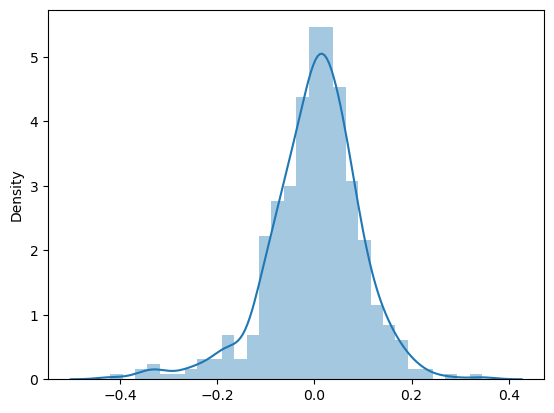

In [52]:
# checking distribution of error terms 

res = y_train - y_train_pred
sns.distplot(res)
plt.show()

The model is a good fit since the error tearms are normally distributed with mean 0 based on the residual analysis

### Step 8: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [53]:
# transforming the test data

df_test[num_cols] = scaler.transform(df_test[num_cols])



In [54]:
# Checking the test data

df_test.describe()


,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow + Rain,Mist + Cloudy,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.497717,0.036530,0.516743,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.311080,0.188034,0.343089,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# Dividing into X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test



In [56]:
# Dropping off the insignificant columns from test data

X_test = X_test[X.columns]
X_test


,yr,holiday,workingday,temp,windspeed,Light Snow + Rain,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.084219,0,1,0,0,0
535,1,0,1,0.901354,0.153728,0,0,0,1,0
299,0,0,0,0.511964,0.334206,0,1,0,0,1
221,0,0,1,0.881625,0.339570,0,0,0,0,0
152,0,0,0,0.817246,0.537414,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
400,1,0,1,0.257562,0.287411,0,1,1,0,0
702,1,0,1,0.519232,0.283397,0,0,0,0,1
127,0,0,1,0.584649,0.069510,0,0,0,1,0
640,1,0,1,0.745598,0.052115,0,1,0,0,1


In [57]:
# Adding the constant
X_test_sm = sm.add_constant(X_test)

In [58]:
#Predicting the y_test 
y_test_pred = lr_model.predict(X_test_sm)

In [59]:
# Checking R Square

print(r2_score(y_test,y_test_pred))



0.8045012773764902


As we can see here the R square of the model is ~80% which is able to explain the 80% variance in the test data similar to th train data hence we can say that the model is good

### Step 9: Model Evaluation

In [60]:
Param = abs(lr_model.params)
Param.sort_values(ascending=False)

temp                 0.465535
Light Snow + Rain    0.280400
const                0.239402
yr                   0.233902
windspeed            0.154801
holiday              0.104364
spring               0.082410
Mist + Cloudy        0.078174
winter               0.077344
summer               0.038053
workingday           0.022262
dtype: float64

#### The equation for the best fit line is as follows:

cnt = 0.239 + 0.234 x yr - 0.104 x holiday -0.022 x workingday + 0.465 x temp - 0.155 x windspeed - 0.280 x Light_Rain_Snow -0.078 x Mist_cloudy - 0.082 x Spring + 0.038 x Summer + 0.077 x Winter




###  Selecting for top predictor variable

The top 3 predictors are temp, yr and Light_Rain_Snow